In [1]:
#!/usr/bin/env python3

In [9]:
# import librarys
import pandas as pd
#import matplotlib.pyplot as plt
from urllib.parse import urlsplit

In [36]:
# pathes
csv = '../data/database/db_as_is.csv'

In [4]:
# read csv data
df = pd.read_csv(csv)

In [5]:
# get shape
df.shape

(537, 6)

In [6]:
# get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Industry         536 non-null    object
 1   Type             536 non-null    object
 2   Name             536 non-null    object
 3   Link             535 non-null    object
 4   Description      531 non-null    object
 5   Added to Github  532 non-null    object
dtypes: object(6)
memory usage: 25.3+ KB


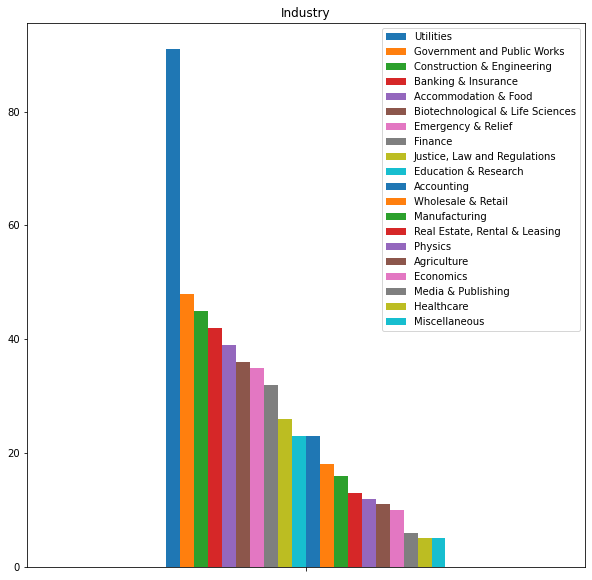

In [42]:
# diagram function
def chart_feature(feature):
    n = df[feature].value_counts()
    df2=pd.DataFrame([n], index=[''])
    #df2.index=[feature]
    ax = df2.plot(kind='bar', stacked=False, figsize=(10,10), title=feature)
    fig = ax.get_figure()
    fig.savefig('01_feature.png')
    
# create diagram by industry
chart_feature('Industry')

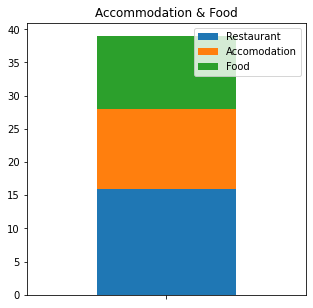

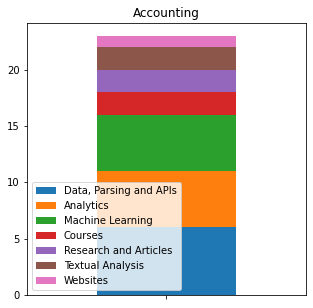

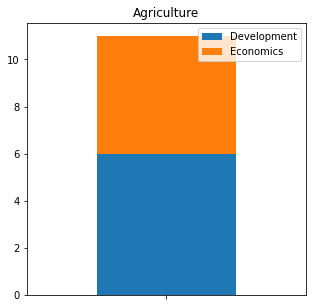

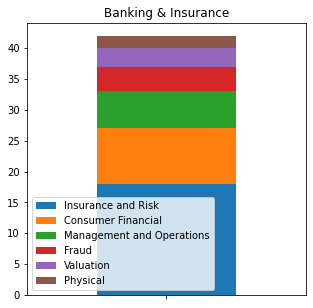

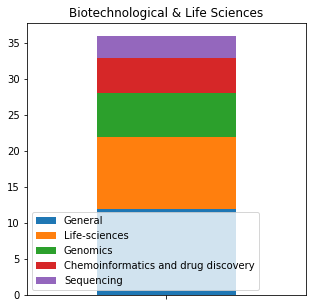

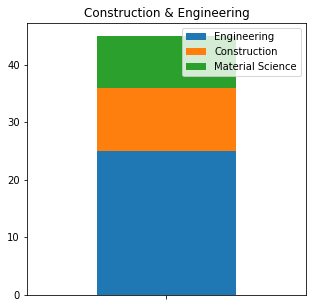

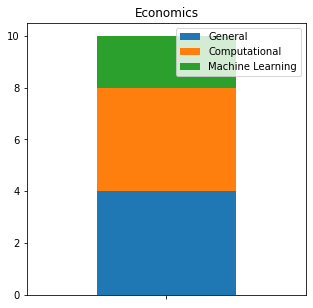

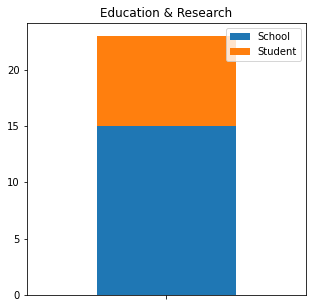

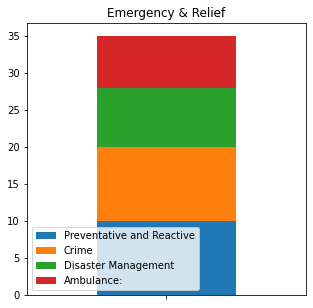

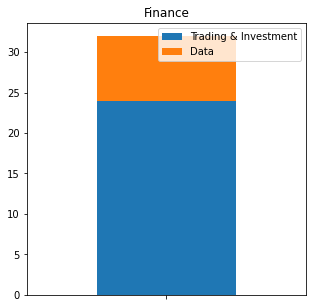

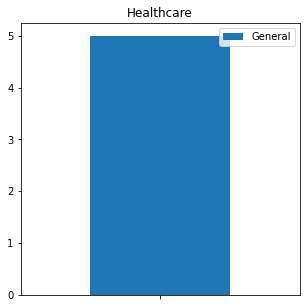

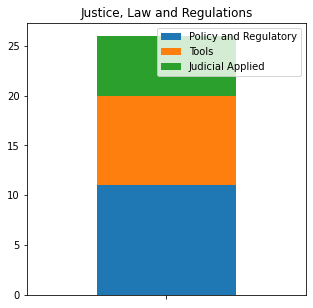

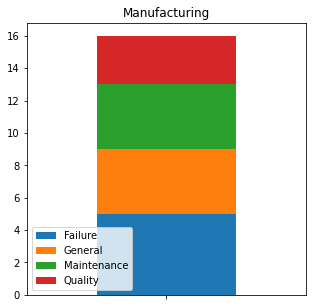

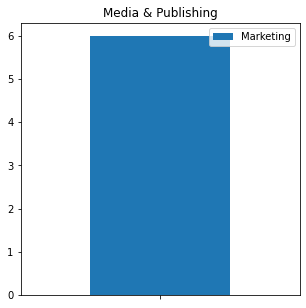

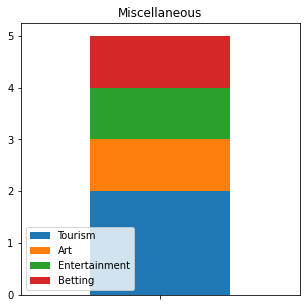

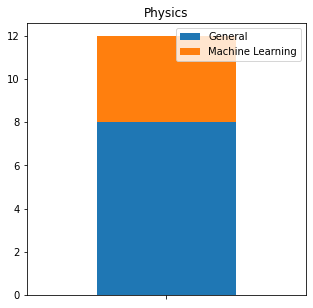

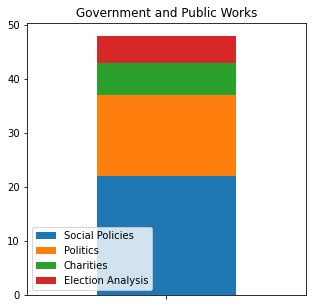

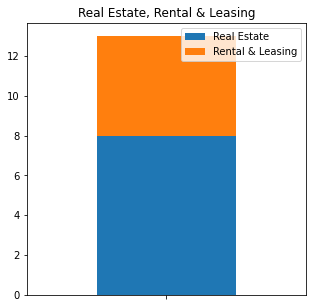

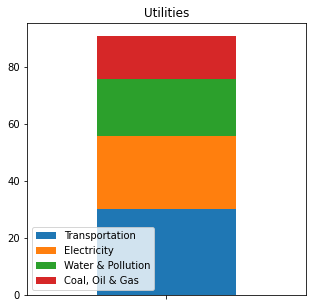

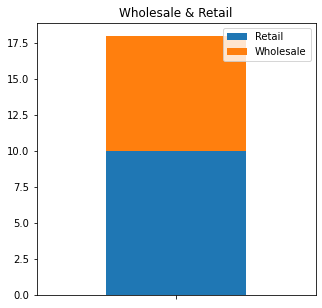

In [43]:
# diagram function (subsection)
def chart_section(section):
    n = df[df['Industry'] == section]['Type'].value_counts()
    if section != 'nan':
        df2=pd.DataFrame([n], index=[''])
        #df2.index=[feature]
        ax = df2.plot(kind='bar',stacked=True, figsize=(5,5), title=section)
        #ax.set_xlabel(section)
        #ax.set_ylabel("count")
        fig = ax.get_figure()
        fig.savefig('02_{}.png'.format(section))
        
# create diagram by subsection
for item in df['Industry'].unique():
    #print(item)
    chart_section(str(item))

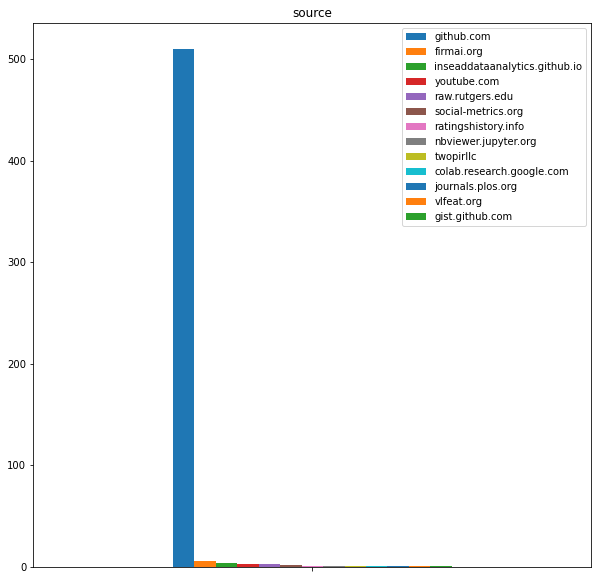

In [47]:
# diagram function (source)
def chart_source():
    data = []

    for link in df['Link']:
        if isinstance(link, str):
            split_url = urlsplit(link)
            split_url = split_url.netloc.replace('www.', '')
            #print(split_url)
            data.append(split_url)
         
    #print(data)
    df2 = pd.DataFrame({'url': data})
    n = df2['url'].value_counts()
    df2=pd.DataFrame([n], index=[''])
    ax = df2.plot(kind='bar', stacked=False, figsize=(10,10), title='source')
    fig = ax.get_figure()
    fig.savefig('03a_sources.png')
    
chart_source()

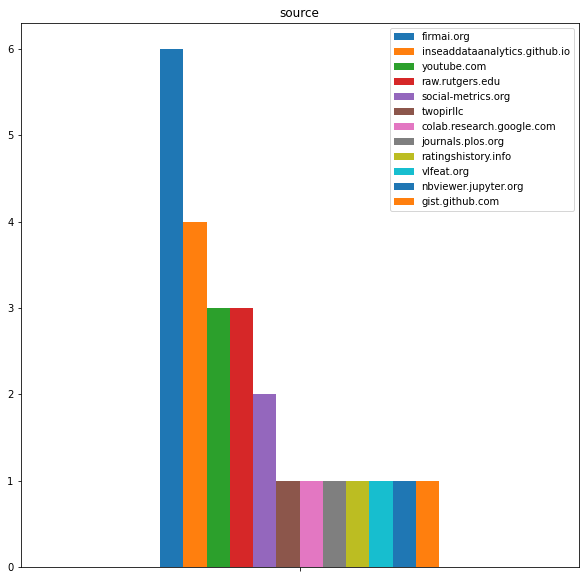

In [51]:
# diagram function (source without github)
def chart_source_except_github():
    data = []

    for link in df['Link']:
        if isinstance(link, str):
            split_url = urlsplit(link)
            split_url = split_url.netloc.replace('www.', '')
            #print(split_url)
            if split_url != 'github.com':
                data.append(split_url)
         
    #print(data)
    df2 = pd.DataFrame({'url': data})
    n = df2['url'].value_counts()
    df2=pd.DataFrame([n], index=[''])
    ax = df2.plot(kind='bar', stacked=False, figsize=(10,10), title='source')
    fig = ax.get_figure()
    fig.savefig('03b_sources_except_github.png')
    
chart_source_except_github()

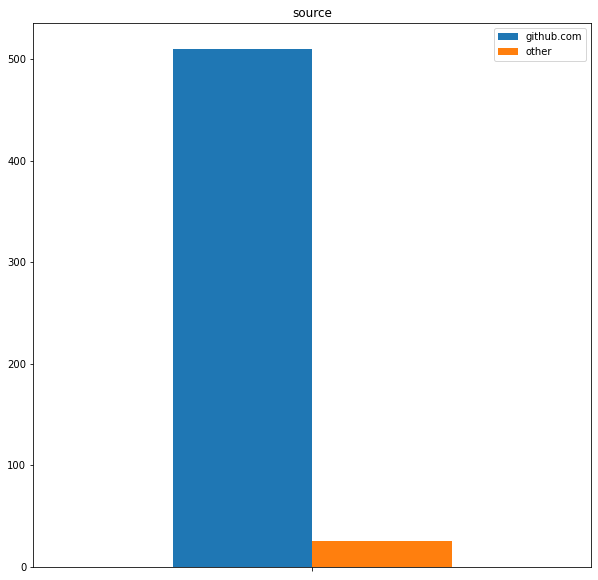

In [49]:
# diagram function (source without github)
def chart_github_others():
    data = []

    for link in df['Link']:
        if isinstance(link, str):
            split_url = urlsplit(link)
            split_url = split_url.netloc.replace('www.', '')
            #print(split_url)
            if split_url == 'github.com':
                data.append('github.com')
            else:
                data.append('other')
         
    #print(data)
    df2 = pd.DataFrame({'url': data})
    n = df2['url'].value_counts()
    df2=pd.DataFrame([n], index=[''])
    ax = df2.plot(kind='bar', stacked=False, figsize=(10,10), title='source')
    fig = ax.get_figure()
    fig.savefig('03c_sources_compact.png')
    
chart_github_others()